# Cervical Cancer Risk Prediction

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

import plotly.express as px

## Load Data

In [5]:
# Dataset Descriptor
# (int) Age
# (int) Number of sexual partners
# (int) First sexual intercourse (age)
# (int) Num of pregnancies
# (bool) Smokes
# (bool) Smokes (years)
# (bool) Smokes (packs/year)
# (bool) Hormonal Contraceptives
# (int) Hormonal Contraceptives (years)
# (bool) IUD ("IUD" stands for "intrauterine device" and used for birth control
# (int) IUD (years)
# (bool) STDs (Sexually transmitted disease)
# (int) STDs (number)
# (bool) STDs:condylomatosis
# (bool) STDs:cervical condylomatosis
# (bool) STDs:vaginal condylomatosis
# (bool) STDs:vulvo-perineal condylomatosis
# (bool) STDs:syphilis
# (bool) STDs:pelvic inflammatory disease
# (bool) STDs:genital herpes
# (bool) STDs:molluscum contagiosum
# (bool) STDs:AIDS
# (bool) STDs:HIV
# (bool) STDs:Hepatitis B
# (bool) STDs:HPV
# (int) STDs: Number of diagnosis
# (int) STDs: Time since first diagnosis
# (int) STDs: Time since last diagnosis
# (bool) Dx:Cancer
# (bool) Dx:CIN
# (bool) Dx:HPV
# (bool) Dx
# (bool) Hinselmann: target variable - A colposcopy is a procedure in which doctors examine the cervix. 
# (bool) Schiller: target variable - Schiller's Iodine test is used for cervical cancer diagnosis
# (bool) Cytology: target variable - Cytology is the exam of a single cell type used for cancer screening.
# (bool) Biopsy: target variable - Biopsy is performed by removing a piece of tissue and examine it under microscope, 
# Biopsy is the main way doctors diagnose most types of cancer. 

In [4]:
cancer_df = pd.read_csv('cervical_cancer.csv')

In [6]:
cancer_df

Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                        ?   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
2                  1.0    0.0            0.0                 0.0   
3                  4.0    1.0           37.0                37.0   
4                  4.0    0.0            0.0                 0.0   
..                 ...    ...            ...                 ...   
853                0.0    0.0            0.0                 0.0   
854                1.0    0.0            0.0                 0.0   
855                0.0    0.0            0.0                 0.0   
856                2.0    0.0            0.0                 0.0   
857                1.0    0.0            0.0                 0.0   

    Hormonal Contraceptives Hormonal Contraceptives (years)  IUD  ...  \
0                       0.0                             0.0  0.0  ...   
1                       0.0                             0.0  0.0  ...   
2                       0.0                             0.0  0.0  ...   
3                       1.0                             3.0  0.0  ...   
4                       1.0                            15.0  0.0  ...   
..                      ...                             ...  ...  ...   
853                     0.0                             0.0  0.0  ...   
854                     1.0                             8.0  0.0  ...   
855                     1.0                            0.08  0.0  ...   
856                     1.0                            0.08  0.0  ...   
857                     1.0                             0.5  0.0  ...   

    STDs: Time since first diagnosis STDs: Time since last diagnosis  \
0                                  ?                               ?   
1                                  ?                               ?   
2                                  ?                               ?   
3                                  ?                               ?   
4                                  ?                               ?   
..                               ...                             ...   
853                                ?                               ?   
854                                ?                               ?   
855                                ?                               ?   
856                                ?                               ?   
857                                ?                               ?   

    Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann Schiller Citology Biopsy  
0           0      0      0  0          0        0        0      0  
1           0      0      0  0          0        0        0      0  
2           0      0      0  0          0        0        0      0  
3           1      0      1  0          0        0        0      0  
4           0      0      0  0          0        0        0      0  
..        ...    ...    ... ..        ...      ...      ...    ...  
853         0      0      0  0          0        0        0      0  
854         0      0      0  0          0        0        0      0  
855         0      0      0  0          0        0        1      0  

## EDA

In [7]:
# Get data frame info
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [8]:
# Get the statistics of the data frame
cancer_df.describe()

Age  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  858.000000                 858.000000  858.000000  858.000000   
mean    26.820513                   0.087413    0.020979    0.010490   
std      8.497948                   0.302545    0.143398    0.101939   
min     13.000000                   0.000000    0.000000    0.000000   
25%     20.000000                   0.000000    0.000000    0.000000   
50%     25.000000                   0.000000    0.000000    0.000000   
75%     32.000000                   0.000000    0.000000    0.000000   
max     84.000000                   3.000000    1.000000    1.000000   

           Dx:HPV          Dx  Hinselmann    Schiller    Citology      Biopsy  
count  858.000000  858.000000  858.000000  858.000000  858.000000  858.000000  
mean     0.020979    0.027972    0.040793    0.086247    0.051282    0.064103  
std      0.143398    0.164989    0.197925    0.280892    0.220701    0.245078  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

In [9]:
# Replace '?' with NaN 
cancer_df = cancer_df.replace('?', np.nan)
cancer_df

Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                      NaN   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
2                  1.0    0.0            0.0                 0.0   
3                  4.0    1.0           37.0                37.0   
4                  4.0    0.0            0.0                 0.0   
..                 ...    ...            ...                 ...   
853                0.0    0.0            0.0                 0.0   
854                1.0    0.0            0.0                 0.0   
855                0.0    0.0            0.0                 0.0   
856                2.0    0.0            0.0                 0.0   
857                1.0    0.0            0.0                 0.0   

    Hormonal Contraceptives Hormonal Contraceptives (years)  IUD  ...  \
0                       0.0                             0.0  0.0  ...   
1                       0.0                             0.0  0.0  ...   
2                       0.0                             0.0  0.0  ...   
3                       1.0                             3.0  0.0  ...   
4                       1.0                            15.0  0.0  ...   
..                      ...                             ...  ...  ...   
853                     0.0                             0.0  0.0  ...   
854                     1.0                             8.0  0.0  ...   
855                     1.0                            0.08  0.0  ...   
856                     1.0                            0.08  0.0  ...   
857                     1.0                             0.5  0.0  ...   

    STDs: Time since first diagnosis STDs: Time since last diagnosis  \
0                                NaN                             NaN   
1                                NaN                             NaN   
2                                NaN                             NaN   
3                                NaN                             NaN   
4                                NaN                             NaN   
..                               ...                             ...   
853                              NaN                             NaN   
854                              NaN                             NaN   
855                              NaN                             NaN   
856                              NaN                             NaN   
857                              NaN                             NaN   

    Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann Schiller Citology Biopsy  
0           0      0      0  0          0        0        0      0  
1           0      0      0  0          0        0        0      0  
2           0      0      0  0          0        0        0      0  
3           1      0      1  0          0        0        0      0  
4           0      0      0  0          0        0        0      0  
..        ...    ...    ... ..        ...      ...      ...    ...  
853         0      0      0  0          0        0        0      0  
854         0      0      0  0          0        0        0      0  
855         0      0      0  0          0        0        1      0  

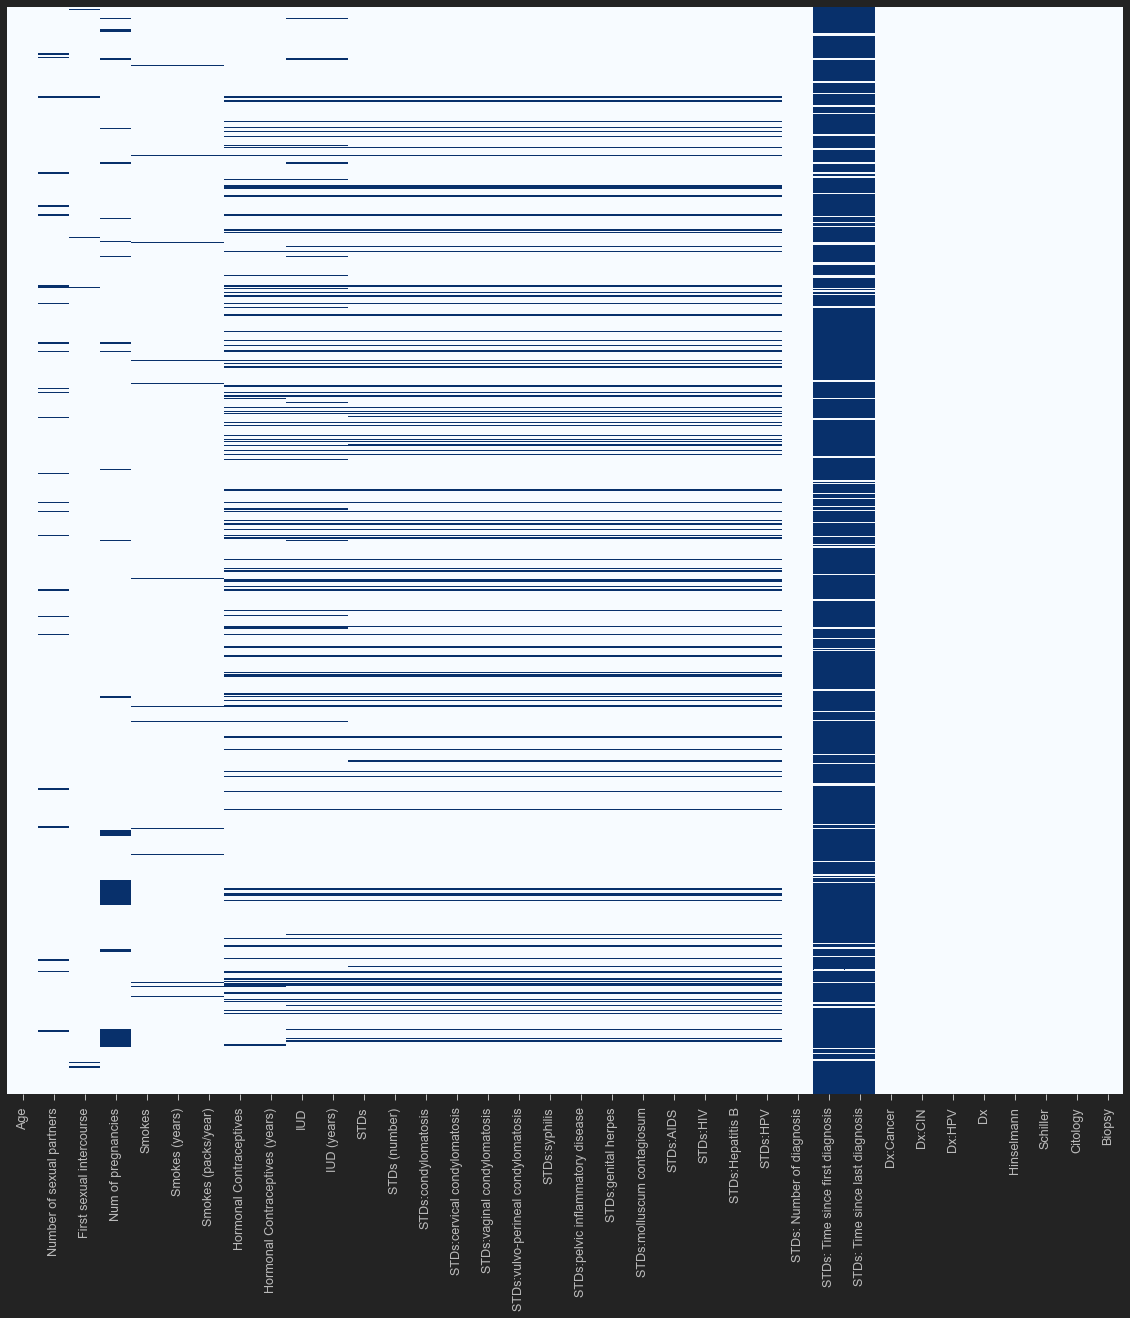

In [8]:
# Plot heatmap
plt.figure(figsize = (20,20))
sns.heatmap(cancer_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [9]:
# Get data frame info
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [10]:
# Since STDs: Time since first diagnosis  and STDs: Time since last diagnosis have more than 80% missing values 
# we can drop them

cancer_df = cancer_df.drop(columns = ['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])
cancer_df

Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                      NaN   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
2                  1.0    0.0            0.0                 0.0   
3                  4.0    1.0           37.0                37.0   
4                  4.0    0.0            0.0                 0.0   
..                 ...    ...            ...                 ...   
853                0.0    0.0            0.0                 0.0   
854                1.0    0.0            0.0                 0.0   
855                0.0    0.0            0.0                 0.0   
856                2.0    0.0            0.0                 0.0   
857                1.0    0.0            0.0                 0.0   

    Hormonal Contraceptives Hormonal Contraceptives (years)  IUD  ...  \
0                       0.0                             0.0  0.0  ...   
1                       0.0                             0.0  0.0  ...   
2                       0.0                             0.0  0.0  ...   
3                       1.0                             3.0  0.0  ...   
4                       1.0                            15.0  0.0  ...   
..                      ...                             ...  ...  ...   
853                     0.0                             0.0  0.0  ...   
854                     1.0                             8.0  0.0  ...   
855                     1.0                            0.08  0.0  ...   
856                     1.0                            0.08  0.0  ...   
857                     1.0                             0.5  0.0  ...   

    STDs:HPV STDs: Number of diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann  \
0        0.0                         0         0      0      0  0          0   
1        0.0                         0         0      0      0  0          0   
2        0.0                         0         0      0      0  0          0   
3        0.0                         0         1      0      1  0          0   
4        0.0                         0         0      0      0  0          0   
..       ...                       ...       ...    ...    ... ..        ...   
853      0.0                         0         0      0      0  0          0   
854      0.0                         0         0      0      0  0          0   
855      0.0                         0         0      0      0  0          0   
856      0.0                         0         0      0      0  0          0   
857      0.0                         0         0      0      0  0          0   

    Schiller Citology Biopsy  
0          0        0      0  
1          0        0      0  
2          0        0      0  
3          0        0      0  
4          0        0      0  
..       ...      ...    ...  
853        0        0      0  
854        0        0      0  
855        0        1      0  
856        0        0      0  
857        0        0      0  

[858 rows x 34 columns]

In [11]:
# Since most of the column types are object, we are not able to get the statistics of the dataframe.
# Convert them to numeric type

cancer_df = cancer_df.apply(pd.to_numeric)
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [12]:
# Get the statistics of the dataframe
cancer_df.describe()

Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 832.000000                851.000000   
mean    26.820513                   2.527644                 16.995300   
std      8.497948                   1.667760                  2.803355   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          802.000000  845.000000      845.000000           845.000000   
mean             2.275561    0.145562        1.219721             0.453144   
std              1.447414    0.352876        4.089017             2.226610   
min              0.000000    0.000000        0.000000             0.000000   
25%              1.000000    0.000000        0.000000             0.000000   
50%              2.000000    0.000000        0.000000             0.000000   
75%              3.000000    0.000000        0.000000             0.000000   
max             11.000000    1.000000       37.000000            37.000000   

       Hormonal Contraceptives  Hormonal Contraceptives (years)         IUD  \
count               750.000000                       750.000000  741.000000   
mean                  0.641333                         2.256419    0.112011   
std                   0.479929                         3.764254    0.315593   
min                   0.000000                         0.000000    0.000000   
25%                   0.000000                         0.000000    0.000000   
50%                   1.000000                         0.500000    0.000000   
75%                   1.000000                         3.000000    0.000000   
max                   1.000000                        30.000000    1.000000   

       ...    STDs:HPV  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  ...  753.000000                 858.000000  858.000000  858.000000   
mean   ...    0.002656                   0.087413    0.020979    0.010490   
std    ...    0.051503                   0.302545    0.143398    0.101939   
min    ...    0.000000                   0.000000    0.000000    0.000000   
25%    ...    0.000000                   0.000000    0.000000    0.000000   
50%    ...    0.000000                   0.000000    0.000000    0.000000   
75%    ...    0.000000                   0.000000    0.000000    0.000000   
max    ...    1.000000                   3.000000    1.000000    1.000000   

           Dx:HPV          Dx  Hinselmann    Schiller    Citology      Biopsy  
count  858.000000  858.000000  858.000000  858.000000  858.000000  858.000000  
mean     0.020979    0.027972    0.040793    0.086247    0.051282    0.064103  
std      0.143398    0.164989    0.197925    0.280892    0.220701    0.245078  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000  

[8 rows x 34 columns]

In [13]:
cancer_df.mean()

Age                                   26.820513
Number of sexual partners              2.527644
First sexual intercourse              16.995300
Num of pregnancies                     2.275561
Smokes                                 0.145562
Smokes (years)                         1.219721
Smokes (packs/year)                    0.453144
Hormonal Contraceptives                0.641333
Hormonal Contraceptives (years)        2.256419
IUD                                    0.112011
IUD (years)                            0.514804
STDs                                   0.104914
STDs (number)                          0.176627
STDs:condylomatosis                    0.058433
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.005312
STDs:vulvo-perineal condylomatosis     0.057105
STDs:syphilis                          0.023904
STDs:pelvic inflammatory disease       0.001328
STDs:genital herpes                    0.001328
STDs:molluscum contagiosum             0

In [14]:
cancer_df.mean()

Age                                   26.820513
Number of sexual partners              2.527644
First sexual intercourse              16.995300
Num of pregnancies                     2.275561
Smokes                                 0.145562
Smokes (years)                         1.219721
Smokes (packs/year)                    0.453144
Hormonal Contraceptives                0.641333
Hormonal Contraceptives (years)        2.256419
IUD                                    0.112011
IUD (years)                            0.514804
STDs                                   0.104914
STDs (number)                          0.176627
STDs:condylomatosis                    0.058433
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.005312
STDs:vulvo-perineal condylomatosis     0.057105
STDs:syphilis                          0.023904
STDs:pelvic inflammatory disease       0.001328
STDs:genital herpes                    0.001328
STDs:molluscum contagiosum             0

In [15]:
# Replace null values with mean
cancer_df = cancer_df.fillna(cancer_df.mean())
cancer_df

Age  Number of sexual partners  First sexual intercourse  \
0     18                        4.0                   15.0000   
1     15                        1.0                   14.0000   
2     34                        1.0                   16.9953   
3     52                        5.0                   16.0000   
4     46                        3.0                   21.0000   
..   ...                        ...                       ...   
853   34                        3.0                   18.0000   
854   32                        2.0                   19.0000   
855   25                        2.0                   17.0000   
856   33                        2.0                   24.0000   
857   29                        2.0                   20.0000   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                   1.0     0.0             0.0                  0.0   
1                   1.0     0.0             0.0                  0.0   
2                   1.0     0.0             0.0                  0.0   
3                   4.0     1.0            37.0                 37.0   
4                   4.0     0.0             0.0                  0.0   
..                  ...     ...             ...                  ...   
853                 0.0     0.0             0.0                  0.0   
854                 1.0     0.0             0.0                  0.0   
855                 0.0     0.0             0.0                  0.0   
856                 2.0     0.0             0.0                  0.0   
857                 1.0     0.0             0.0                  0.0   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                        0.0                             0.00  0.0  ...   
1                        0.0                             0.00  0.0  ...   
2                        0.0                             0.00  0.0  ...   
3                        1.0                             3.00  0.0  ...   
4                        1.0                            15.00  0.0  ...   
..                       ...                              ...  ...  ...   
853                      0.0                             0.00  0.0  ...   
854                      1.0                             8.00  0.0  ...   
855                      1.0                             0.08  0.0  ...   
856                      1.0                             0.08  0.0  ...   
857                      1.0                             0.50  0.0  ...   

     STDs:HPV  STDs: Number of diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  \
0         0.0                          0          0       0       0   0   
1         0.0                          0          0       0       0   0   
2         0.0                          0          0       0       0   0   
3         0.0                          0          1       0       1   0   
4         0.0                          0          0       0       0   0   
..        ...                        ...        ...     ...     ...  ..   
853       0.0                          0          0       0       0   0   
854       0.0                          0          0       0       0   0   
855       0.0                          0          0       0       0   0   
856       0.0                          0          0       0       0   0   
857       0.0                          0          0       0       0   0   

     Hinselmann  Schiller  Citology  Biopsy  
0             0         0         0       0  
1             0         0         0       0  
2             0         0         0       0  
3             0         0         0       0  
4             0         0         0       0  
..          ...       ...       ...     ...  
853           0         0         0       0  
854           0         0         0       0  
855           0         0         1       0  
856           0         0         0       0  
857           0         0         0       0  

[858

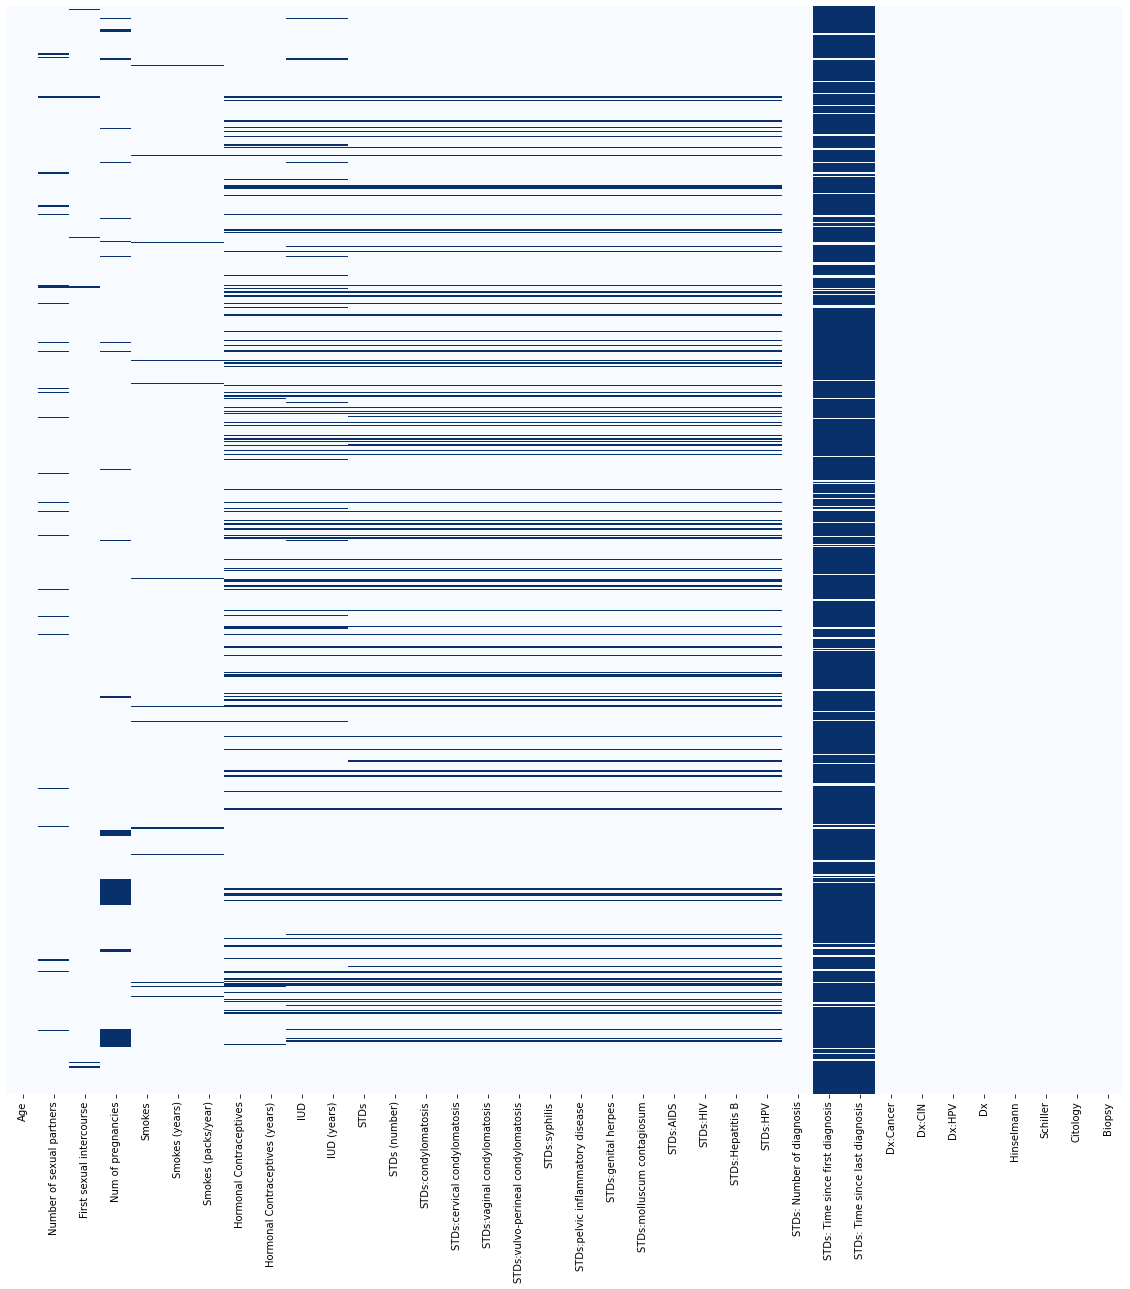

In [10]:
# Nan heatmap
plt.figure(figsize = (20,20))
sns.heatmap(cancer_df.isnull(), yticklabels = False, cbar = False, cmap="Blues");

## Data Viz

In [11]:
# Get the correlation matrix
corr_matrix = cancer_df.corr()
corr_matrix

Age  STDs: Number of diagnosis  Dx:Cancer  \
Age                        1.000000                  -0.001606   0.110340   
STDs: Number of diagnosis -0.001606                   1.000000  -0.015423   
Dx:Cancer                  0.110340                  -0.015423   1.000000   
Dx:CIN                     0.061443                   0.008070  -0.015072   
Dx:HPV                     0.101722                  -0.015423   0.886508   
Dx                         0.092635                  -0.002289   0.665647   
Hinselmann                -0.003967                   0.076787   0.134264   
Schiller                   0.103283                   0.130873   0.157812   
Citology                  -0.016862                   0.055114   0.113446   
Biopsy                     0.055956                   0.097449   0.160905   

                             Dx:CIN    Dx:HPV        Dx  Hinselmann  Schiller  \
Age                        0.061443  0.101722  0.092635   -0.003967  0.103283   
STDs: Number of diagnosis  0.008070 -0.015423 -0.002289    0.076787  0.130873   
Dx:Cancer                 -0.015072  0.886508  0.665647    0.134264  0.157812   
Dx:CIN                     1.000000 -0.015072  0.606939   -0.021233  0.009119   
Dx:HPV                    -0.015072  1.000000  0.616327    0.134264  0.157812   
Dx                         0.606939  0.616327  1.000000    0.072215  0.098952   
Hinselmann                -0.021233  0.134264  0.072215    1.000000  0.650249   
Schiller                   0.009119  0.157812  0.098952    0.650249  1.000000   
Citology                  -0.023938  0.113446  0.088740    0.192467  0.361486   
Biopsy                     0.113172  0.160905  0.157607    0.547417  0.733204   

                           Citology    Biopsy  
Age                       -0.016862  0.055956  
STDs: Number of diagnosis  0.055114  0.097449  
Dx:Cancer                  0.113446  0.160905  
Dx:CIN                    -0.023938  0.113172  
Dx:HPV                     0.113446  0.160905  
Dx                         0.088740  0.157607  
Hinselmann                 0.192467  0.547417  
Schiller                   0.361486  0.733204  
Citology                   1.000000  0.327466  
Biopsy                     0.327466  1.000000

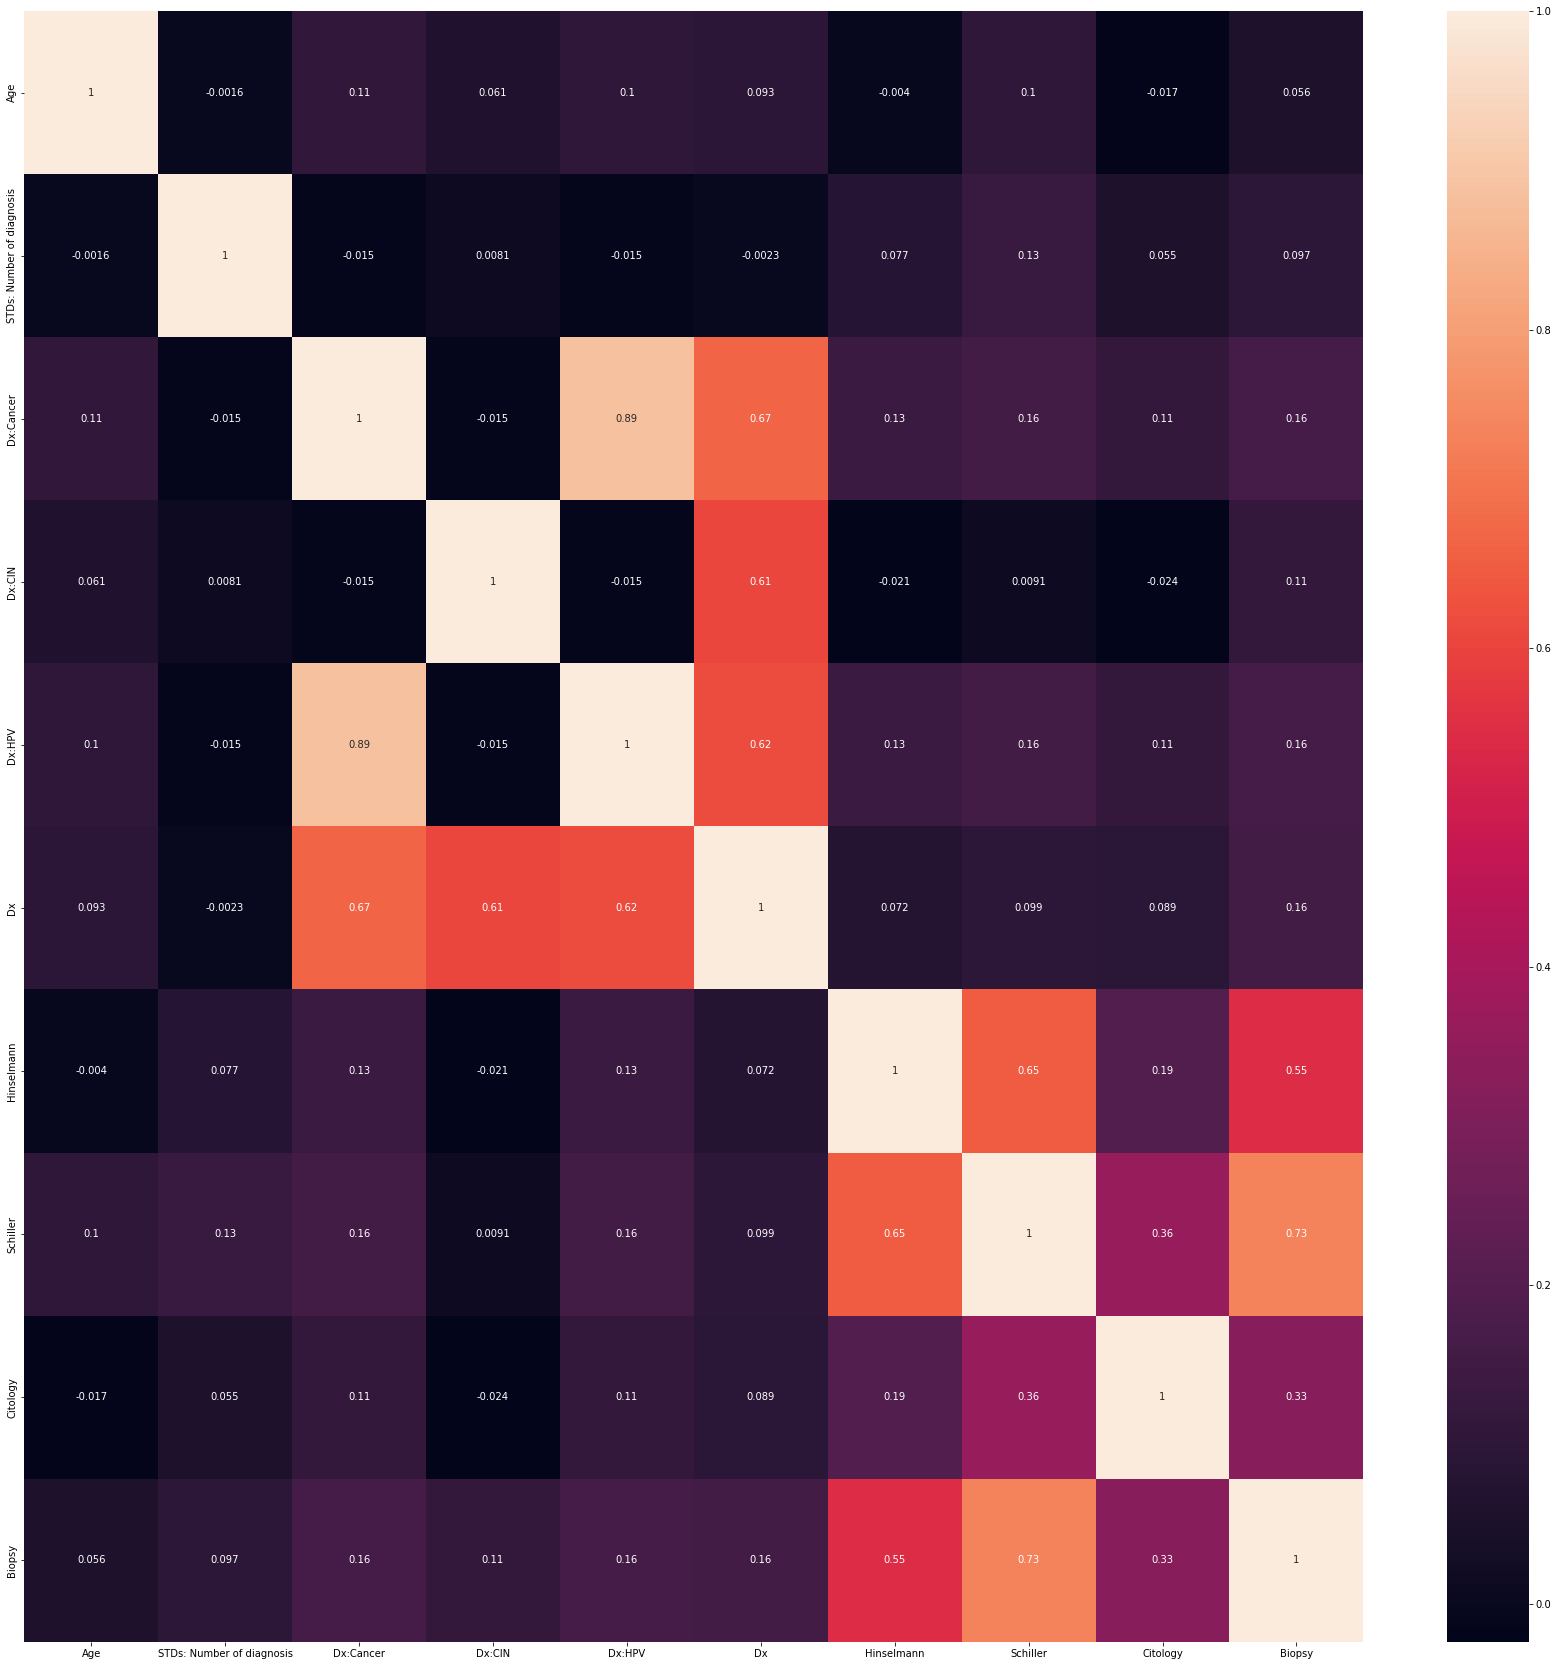

In [12]:
# Plot the correlation matrix
plt.figure(figsize = (30,30))
sns.heatmap(corr_matrix, annot = True)
plt.show();

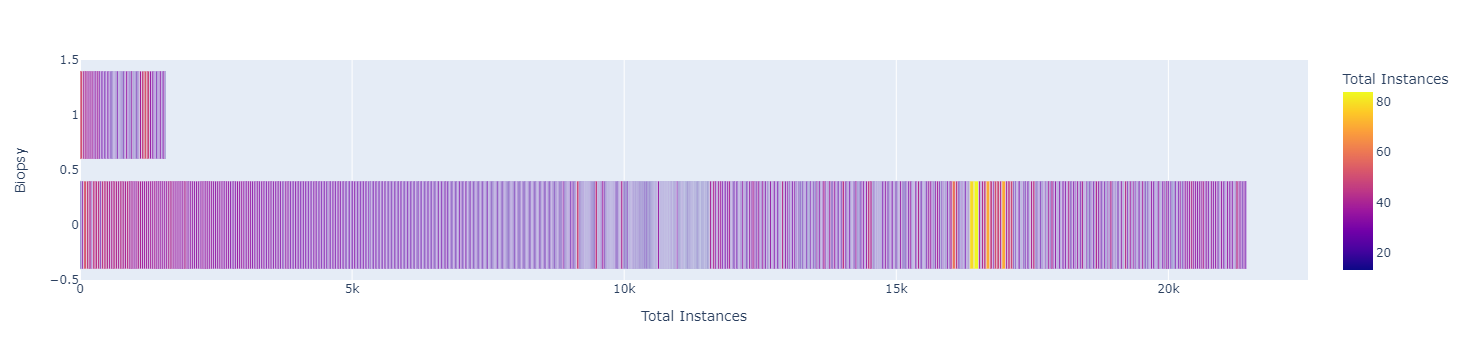

In [13]:
fig = px.bar(cancer_df, x="Age", y="Biopsy", orientation='h', color = 'Age', labels = dict(Age = 'Total Instances'))
fig.show()

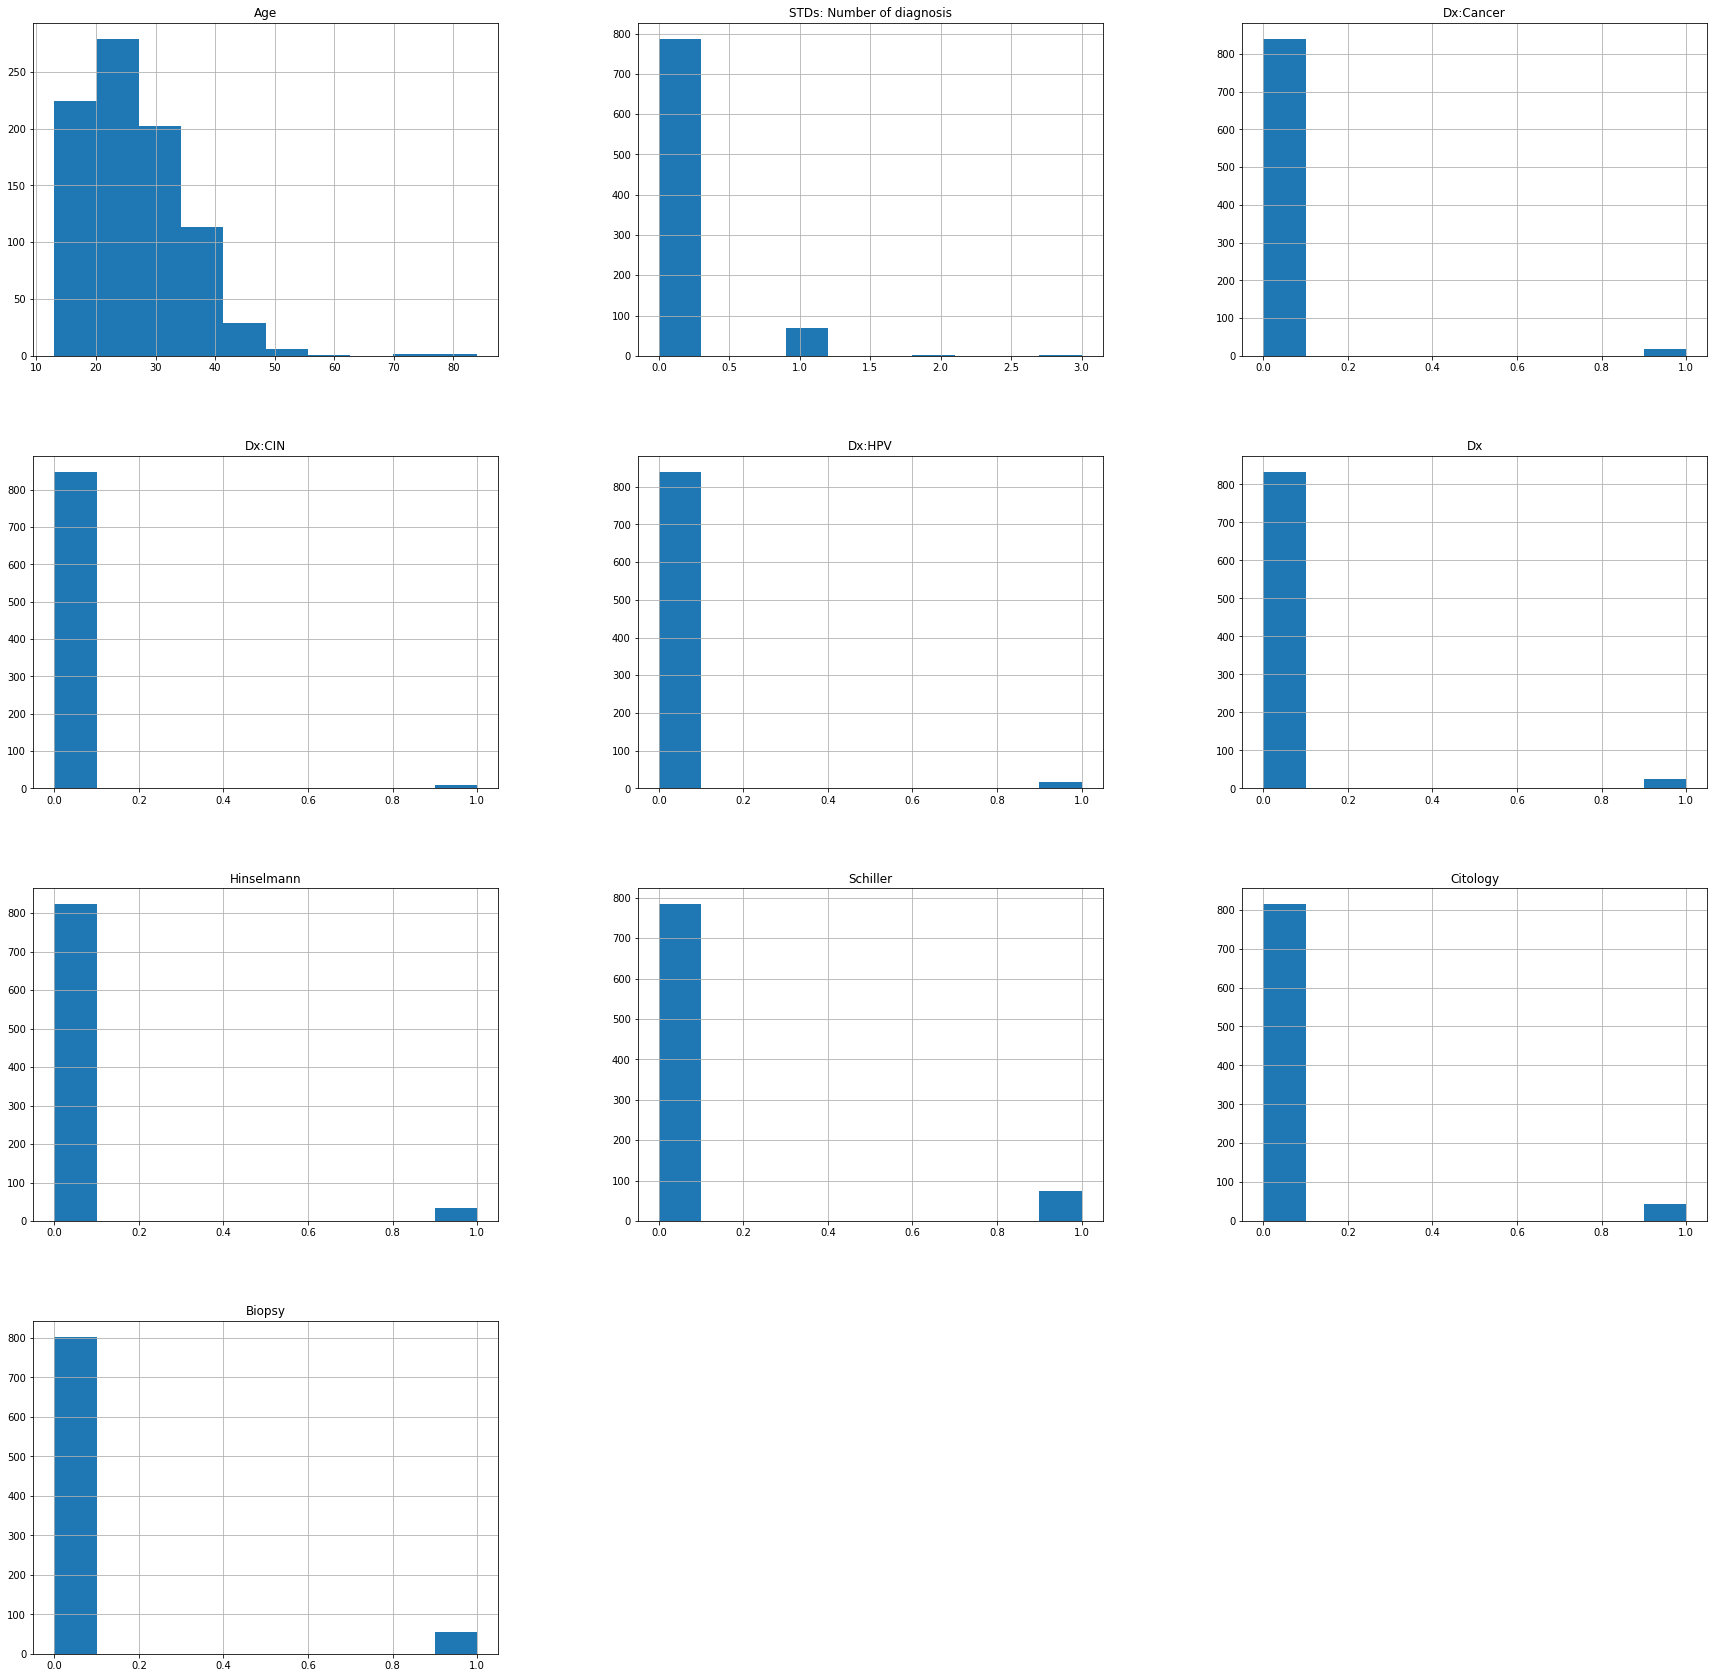

In [15]:
# Plot the histogram
cancer_df.hist(bins = 10, figsize = (30,30), );

## Data Preprocessing

In [16]:
target_df = cancer_df['Biopsy']
input_df = cancer_df.drop(columns = ['Biopsy'])

In [17]:
target_df.shape

(858,)

In [18]:
input_df.shape

(858, 35)

In [19]:
target_df

0      0
1      0
2      0
3      0
4      0
      ..
853    0
854    0
855    0
856    0
857    0
Name: Biopsy, Length: 858, dtype: int64

In [20]:
X = np.array(input_df).astype('float32')
y = np.array(target_df).astype('float32')

In [25]:
y.shape

(858,)

In [21]:
# scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
X

array([[-1.0385634e+00,  8.8336509e-01, -7.1217269e-01, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [-1.3917956e+00, -9.1653639e-01, -1.0690978e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [ 8.4534228e-01, -9.1653639e-01,            nan, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       ...,
       [-2.1435463e-01, -3.1656921e-01,  1.6776740e-03, ...,
        -2.0622157e-01, -3.0722591e-01,  4.3011627e+00],
       [ 7.2759819e-01, -3.1656921e-01,  2.5001538e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [ 2.5662178e-01, -3.1656921e-01,  1.0724531e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01]], dtype=float32)

## Train Test Split

In [23]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

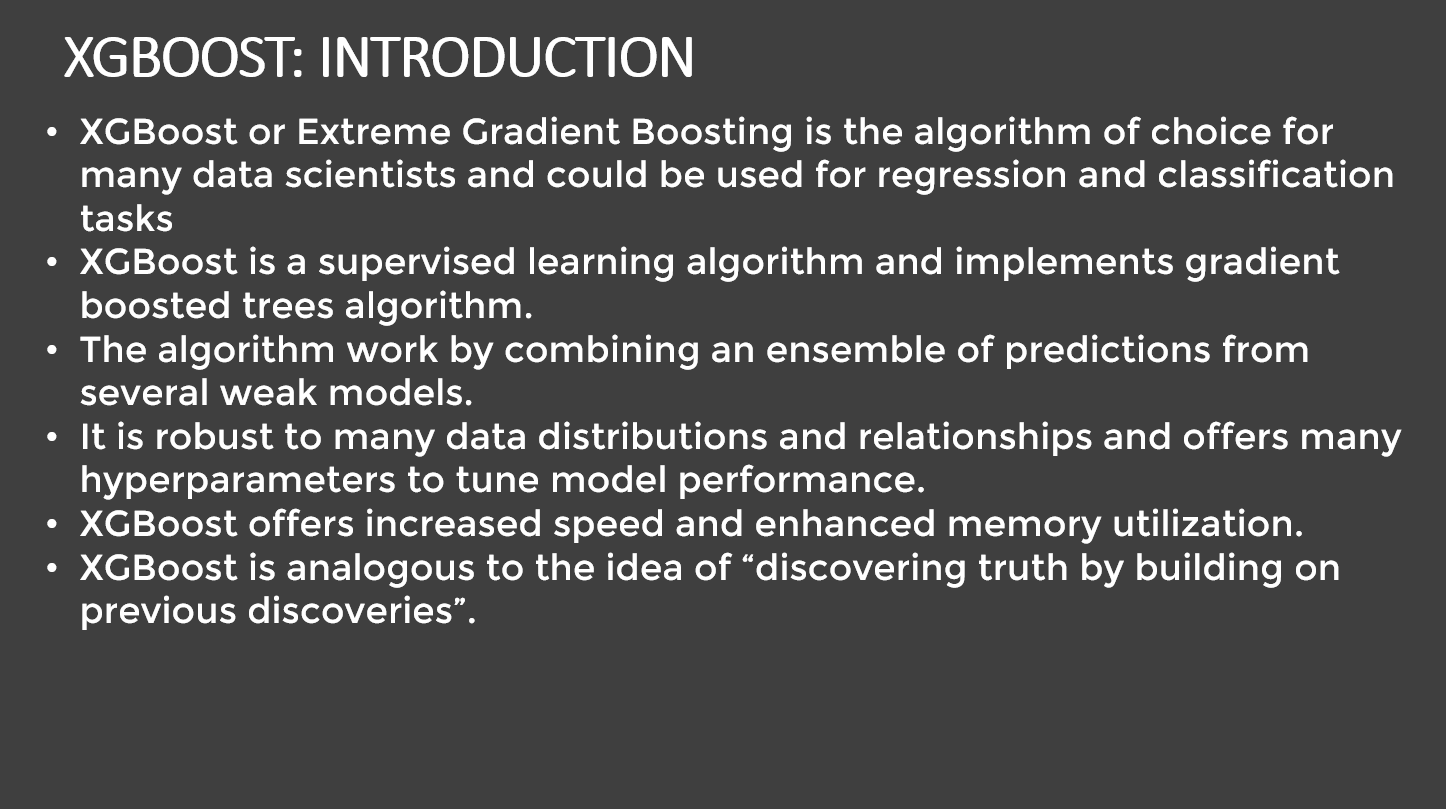

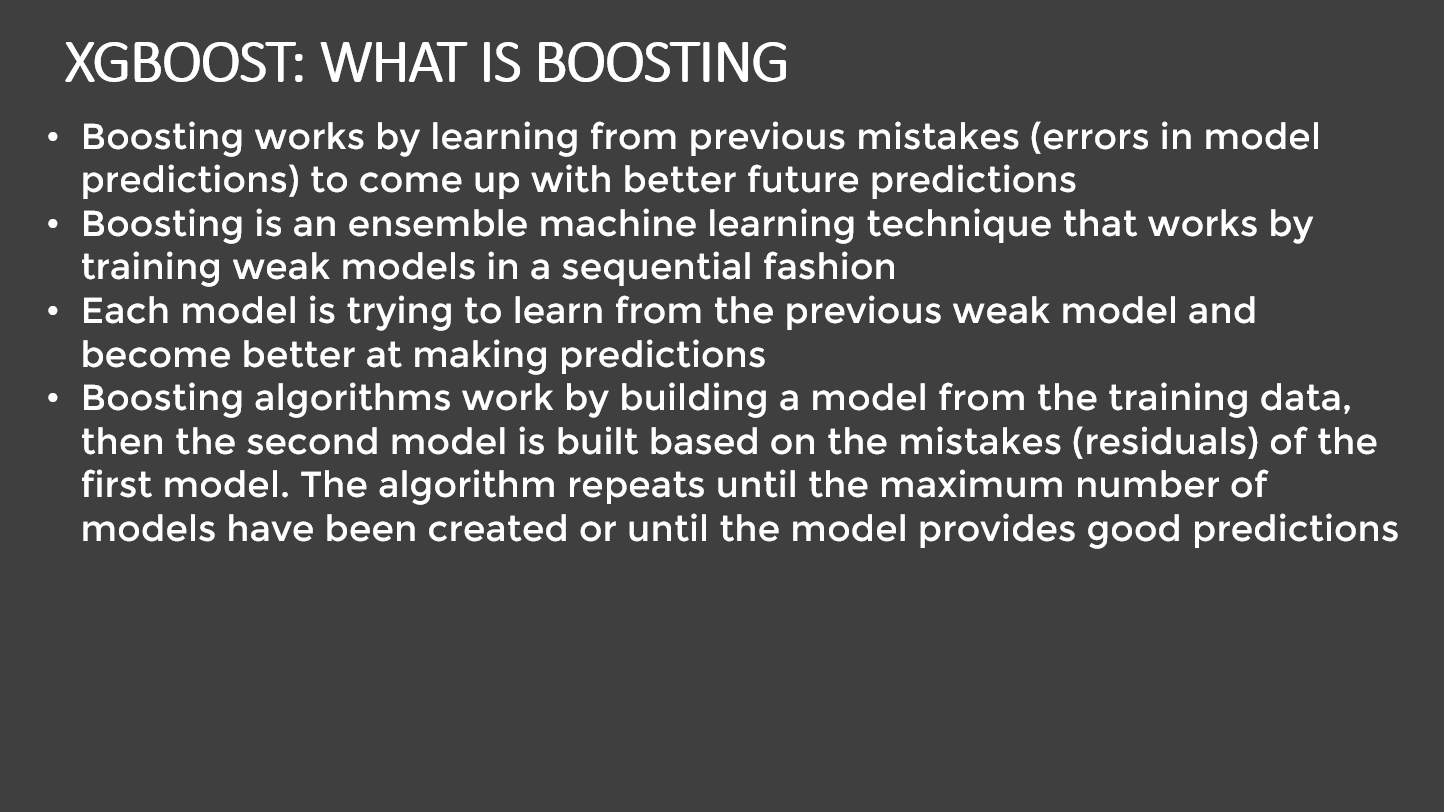

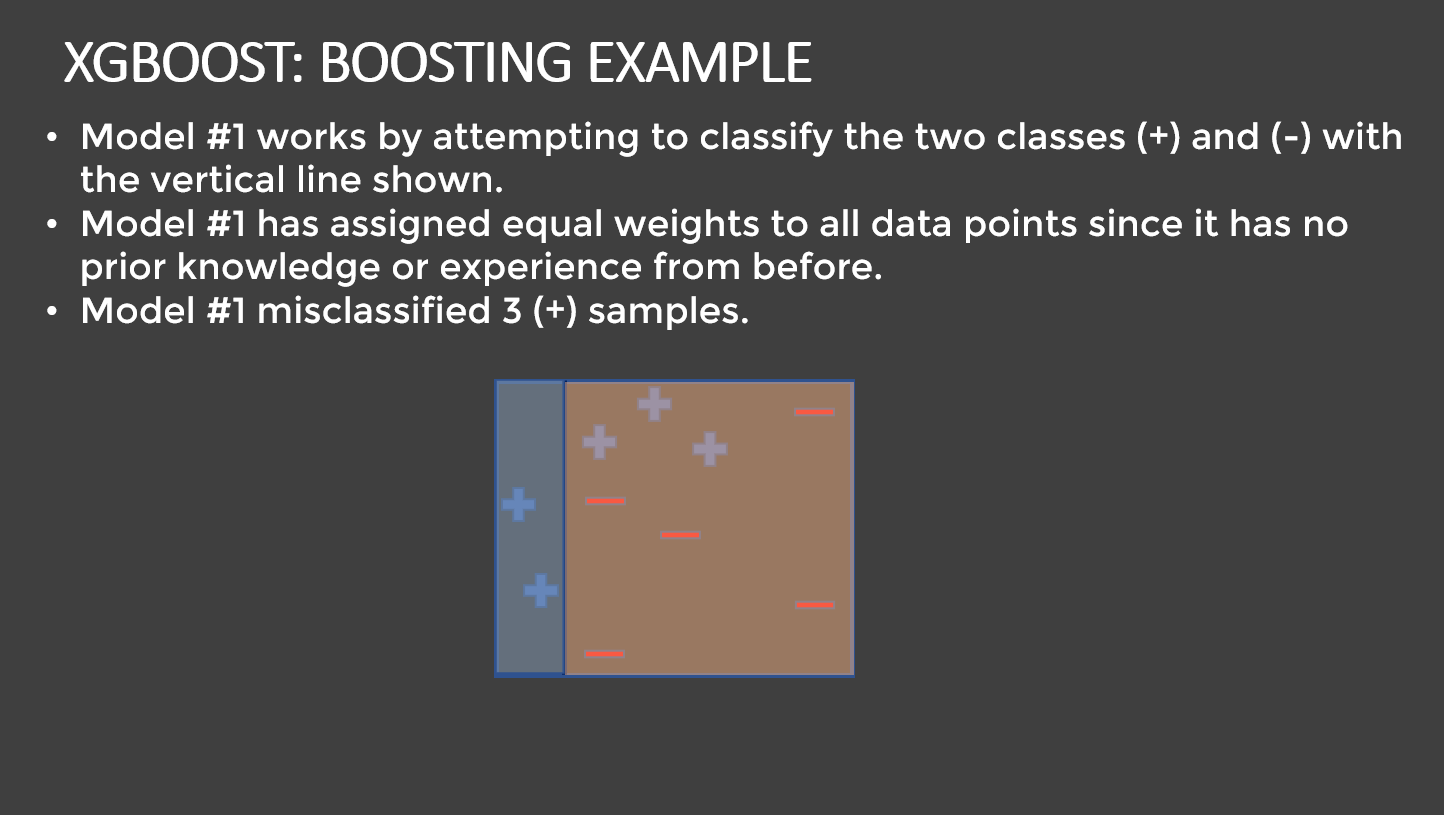

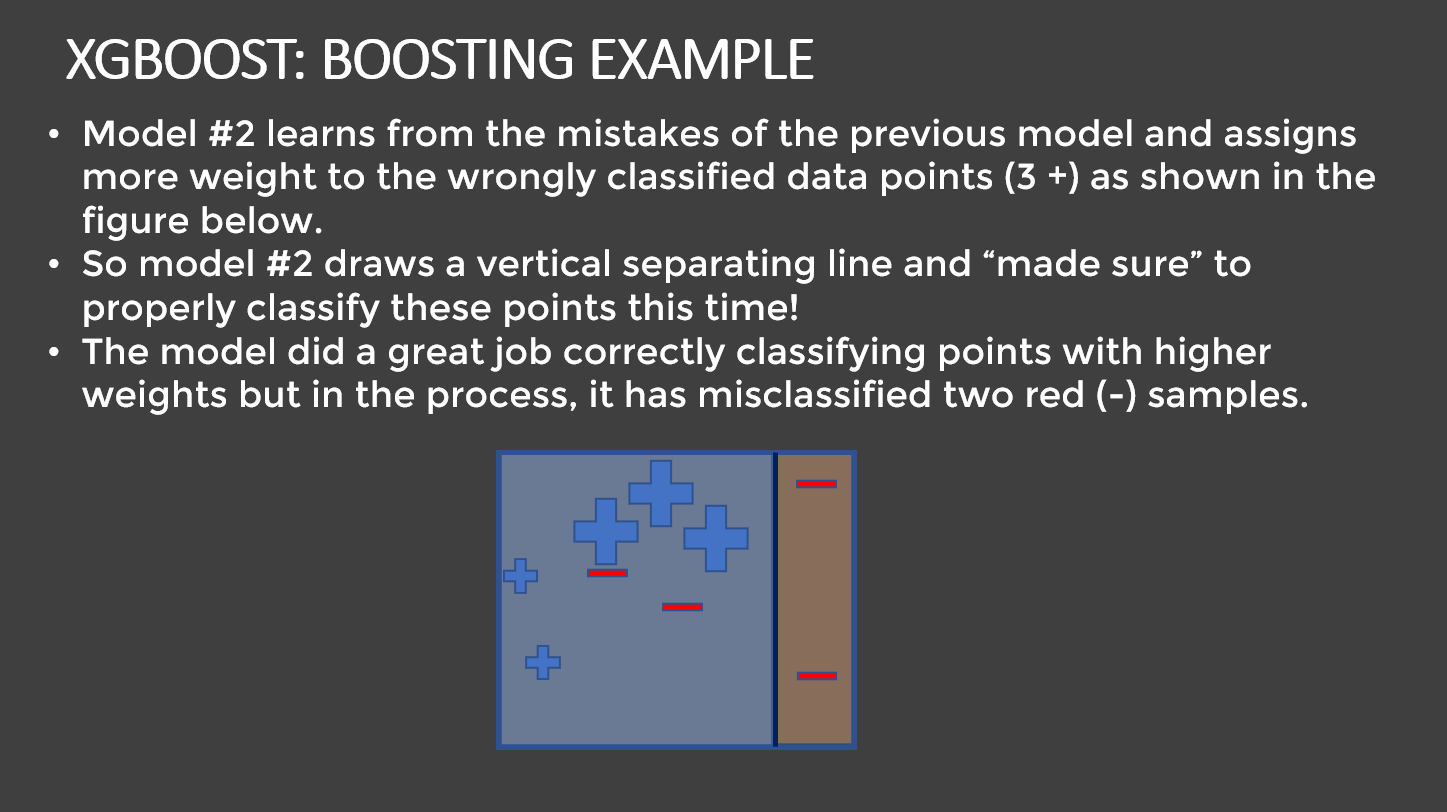

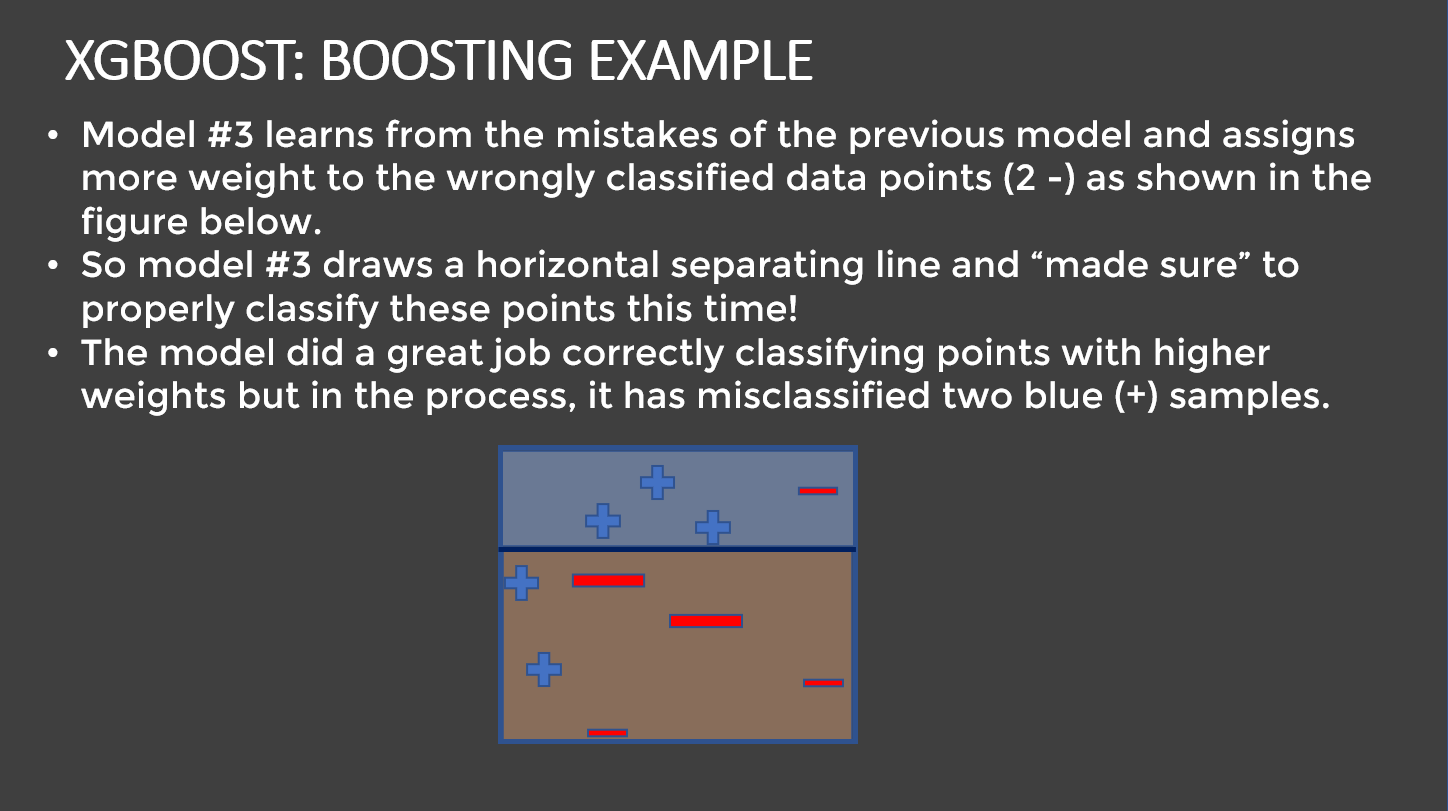

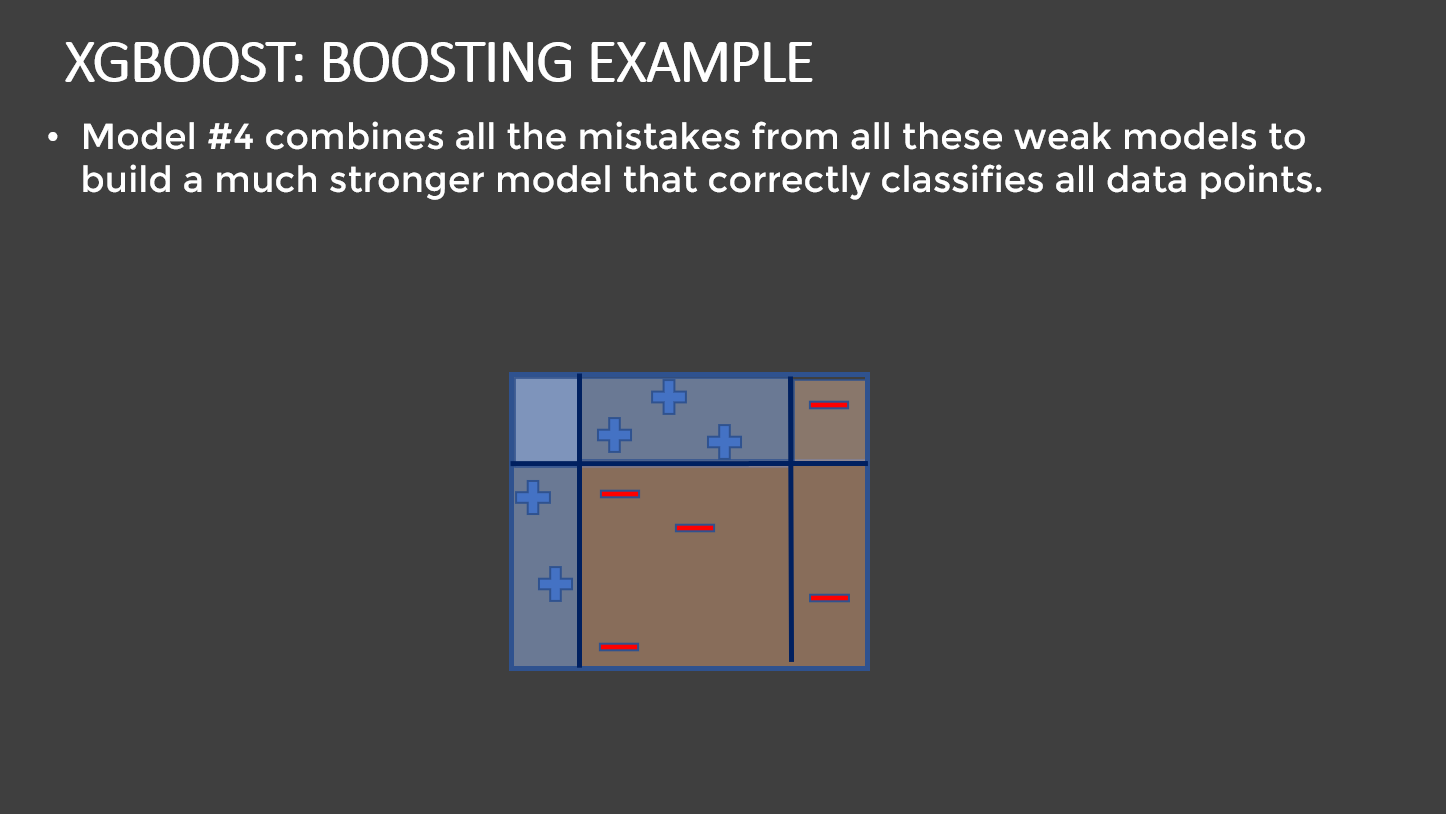

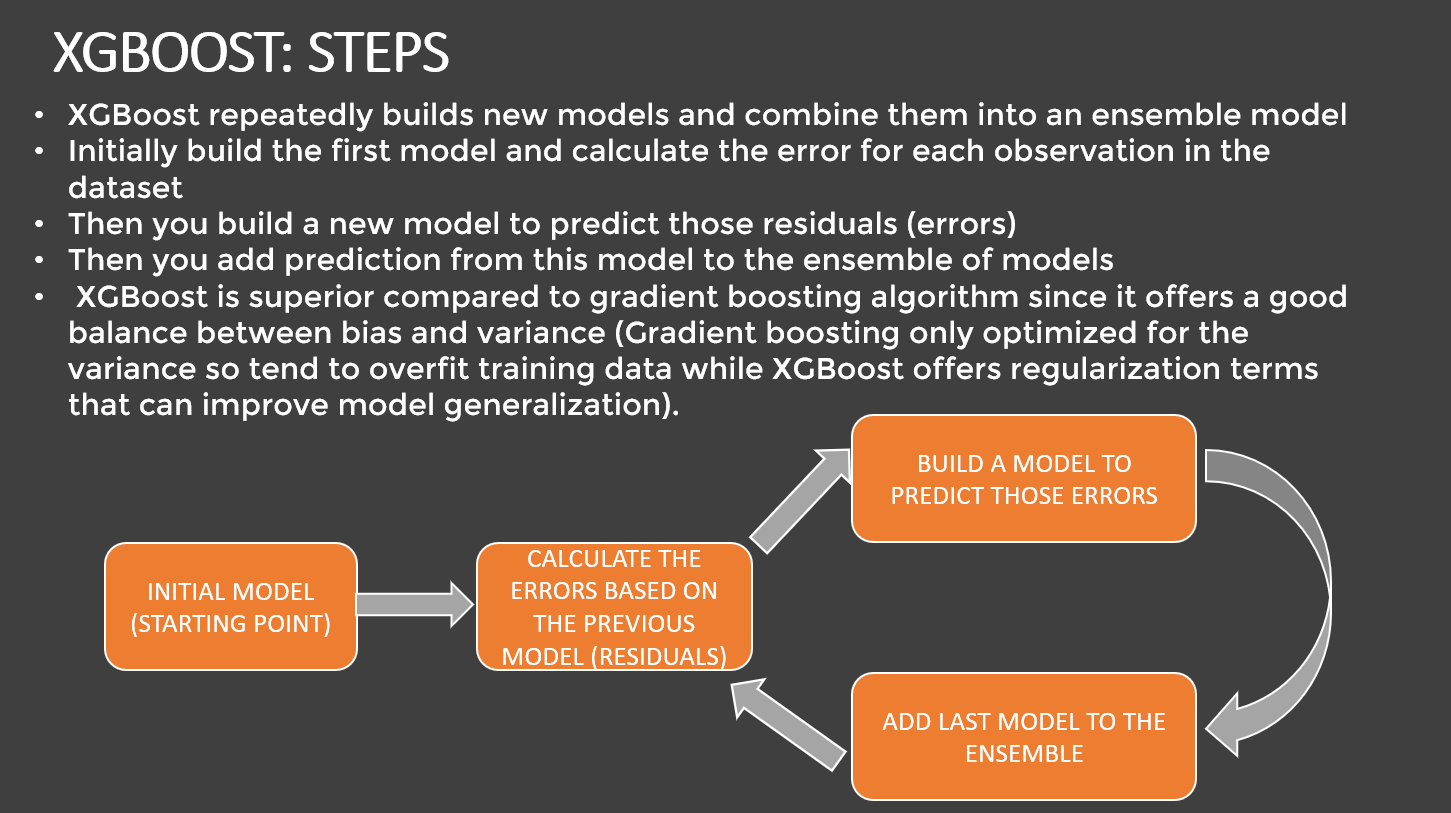

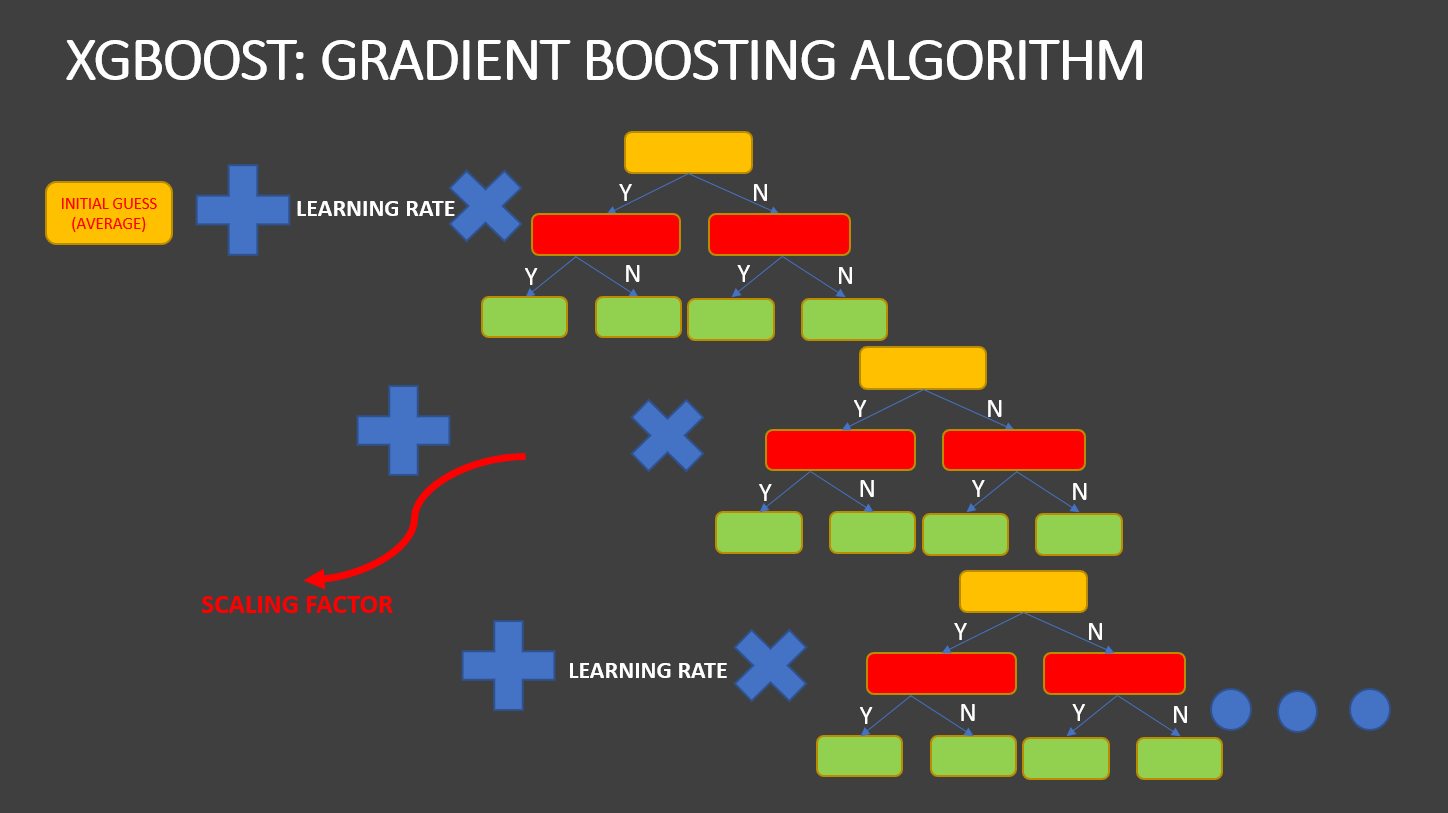

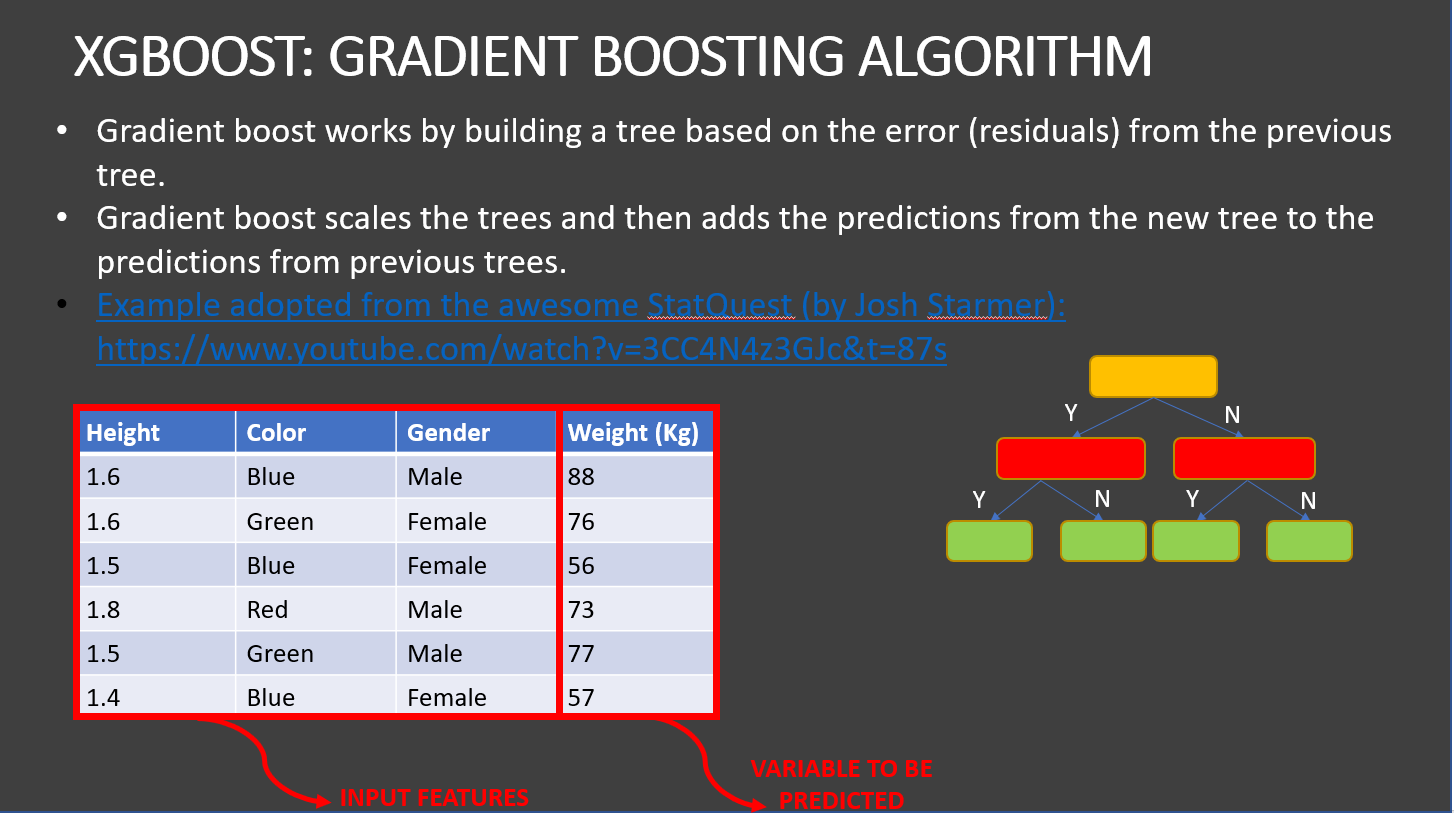

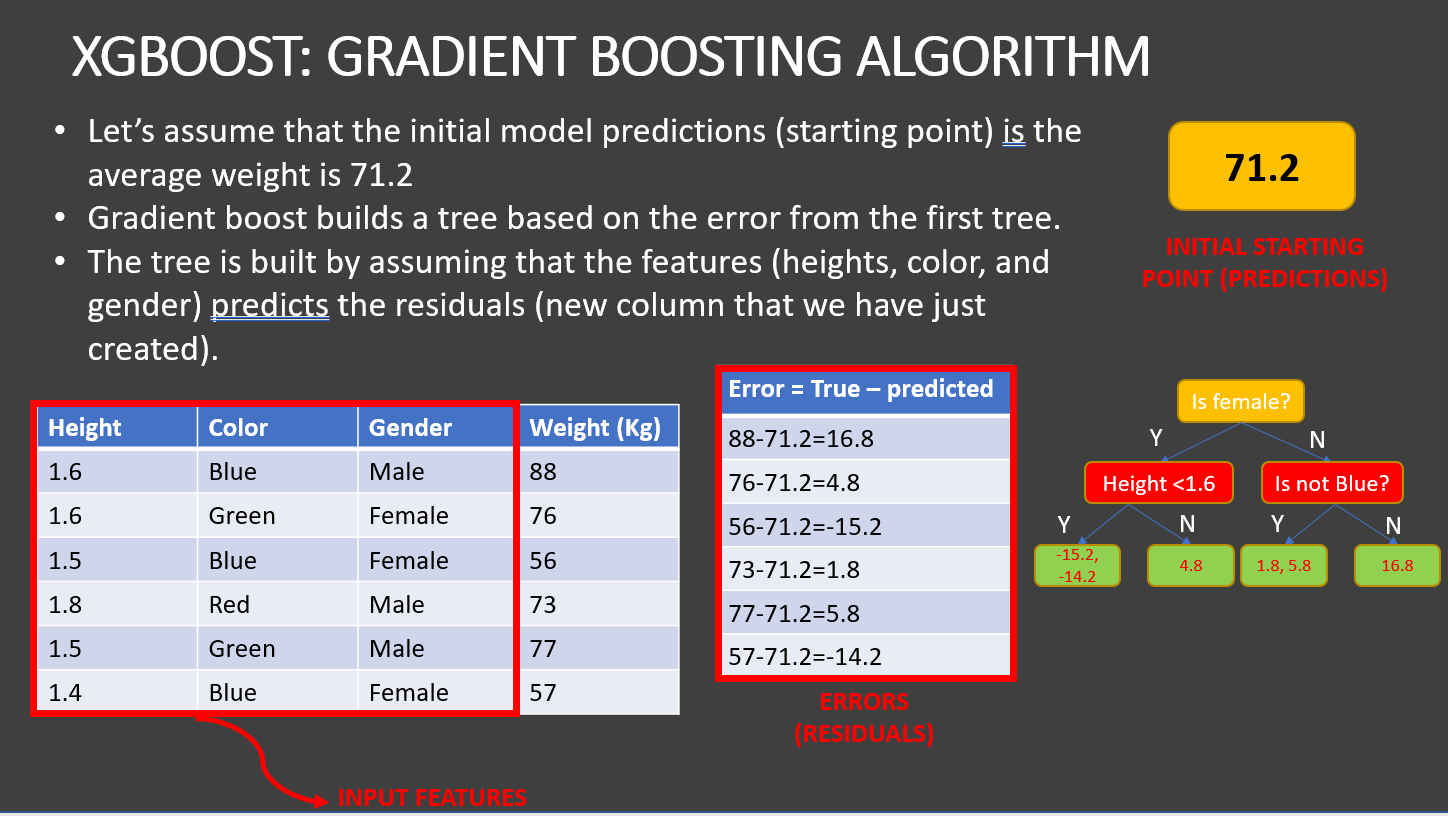

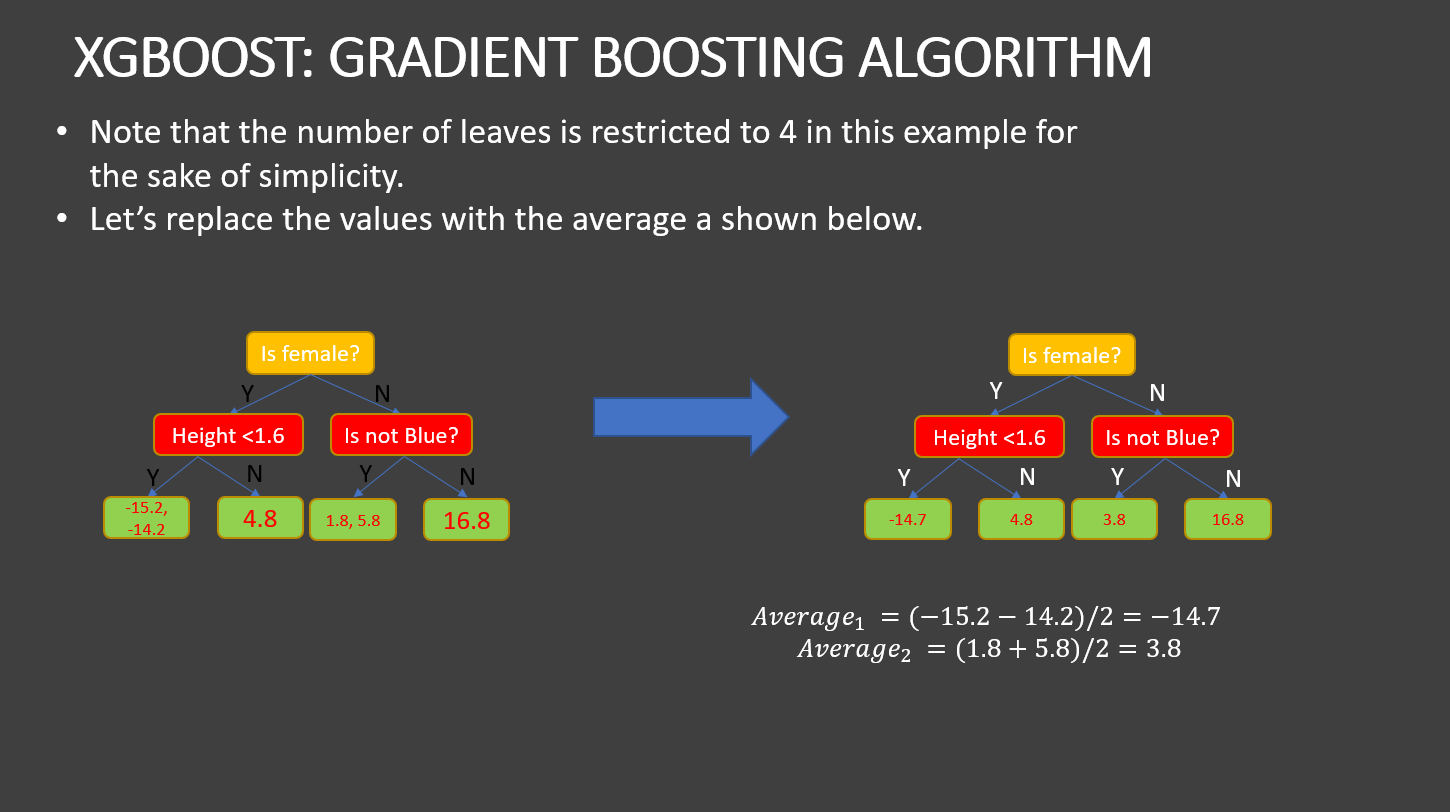

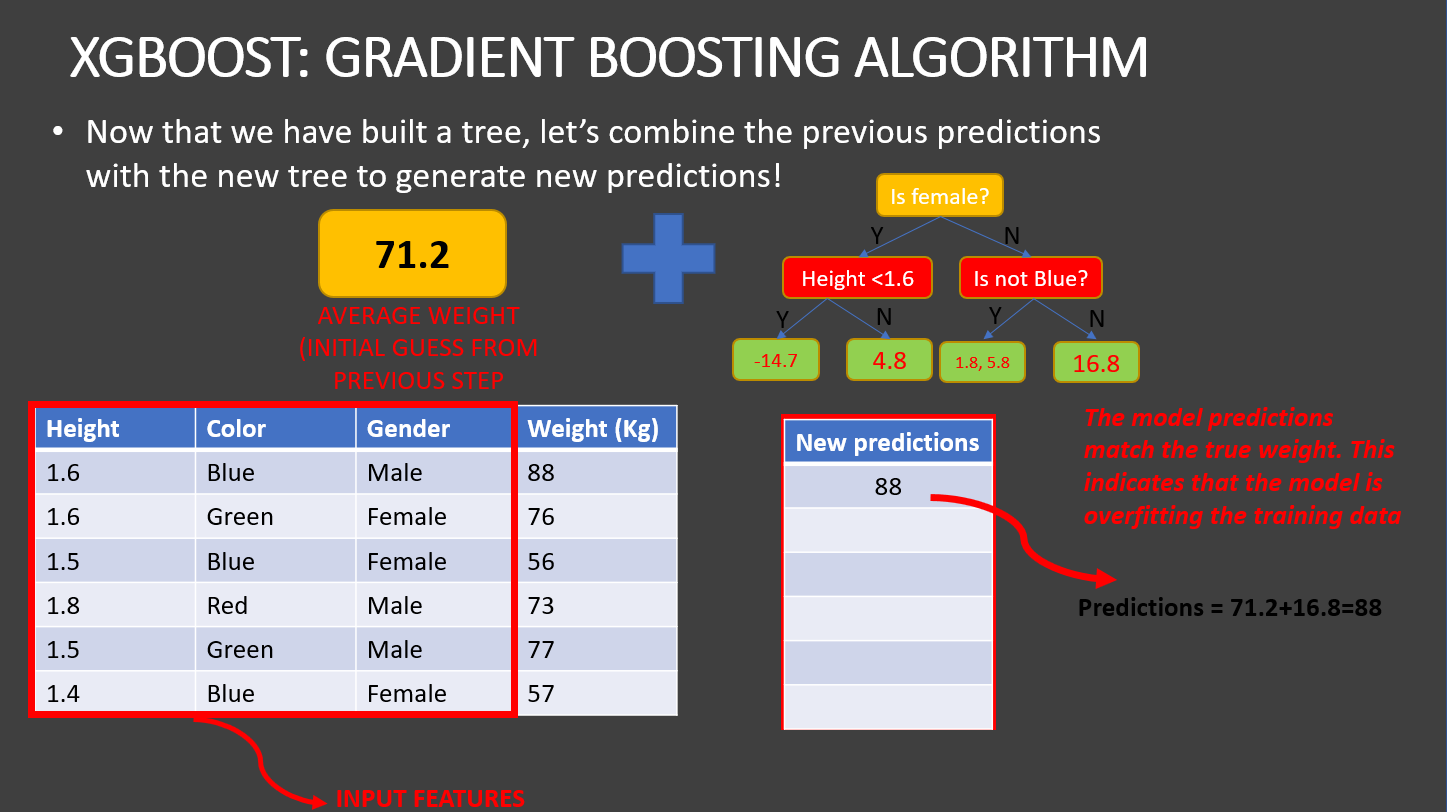

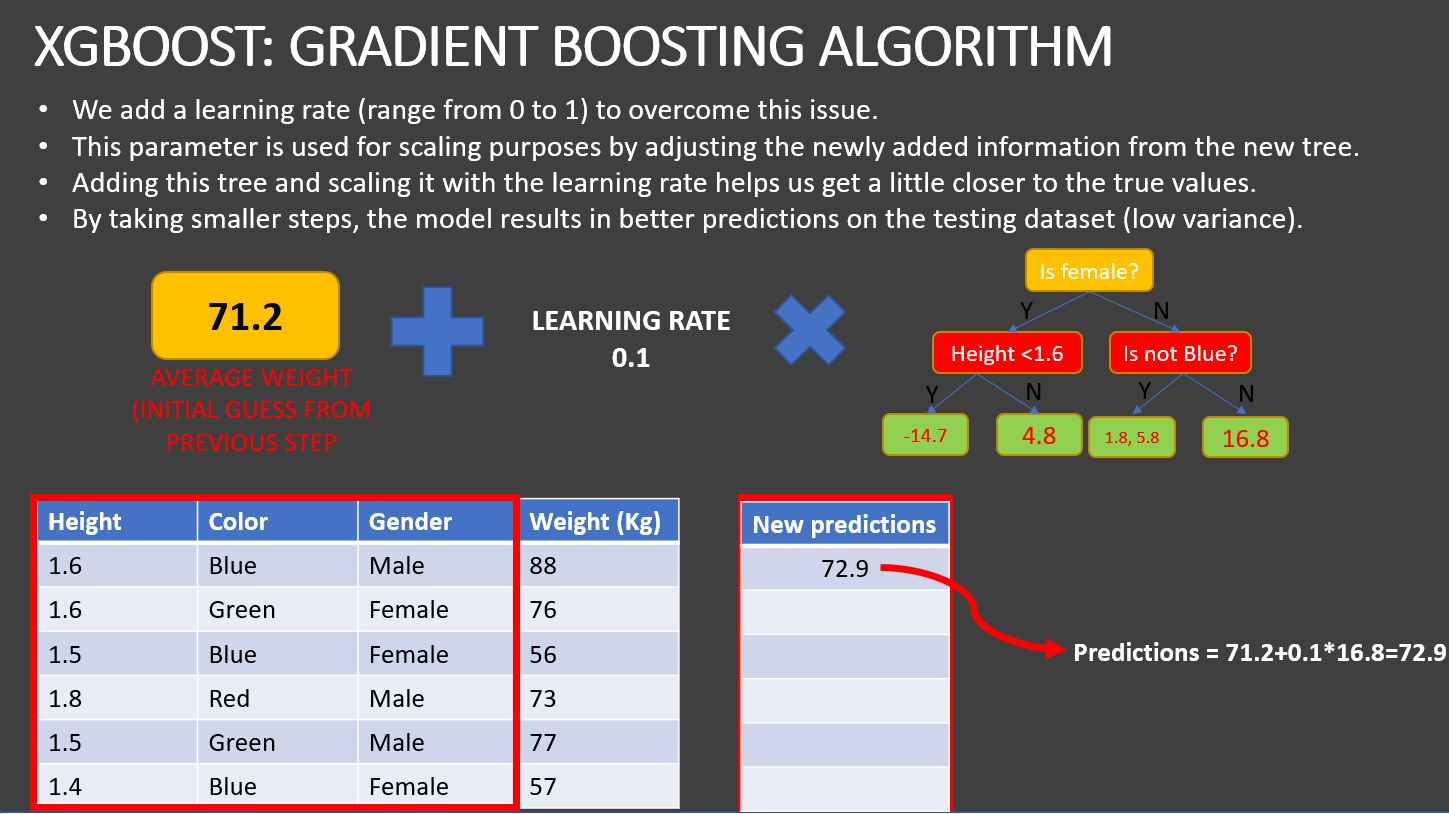

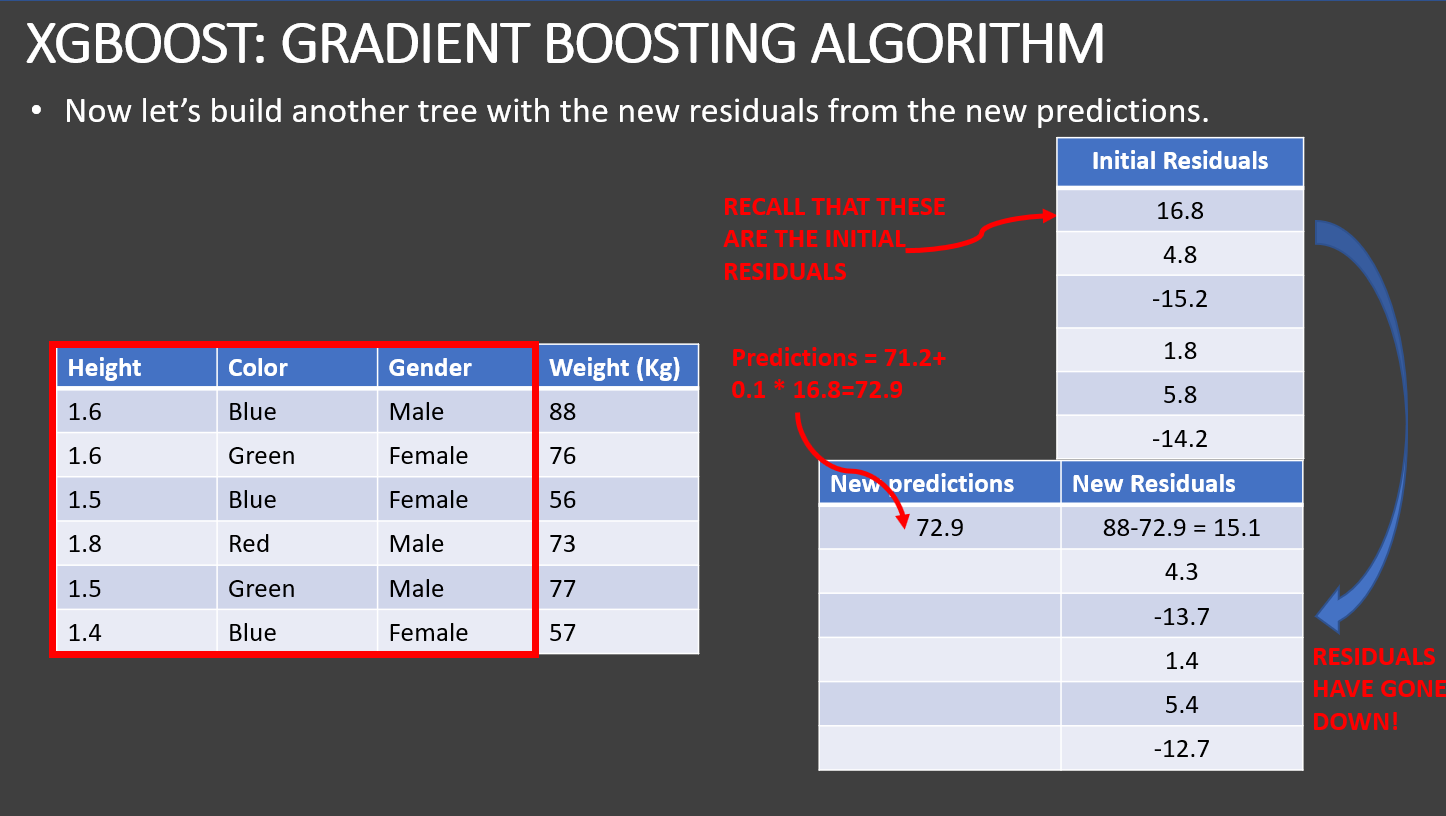

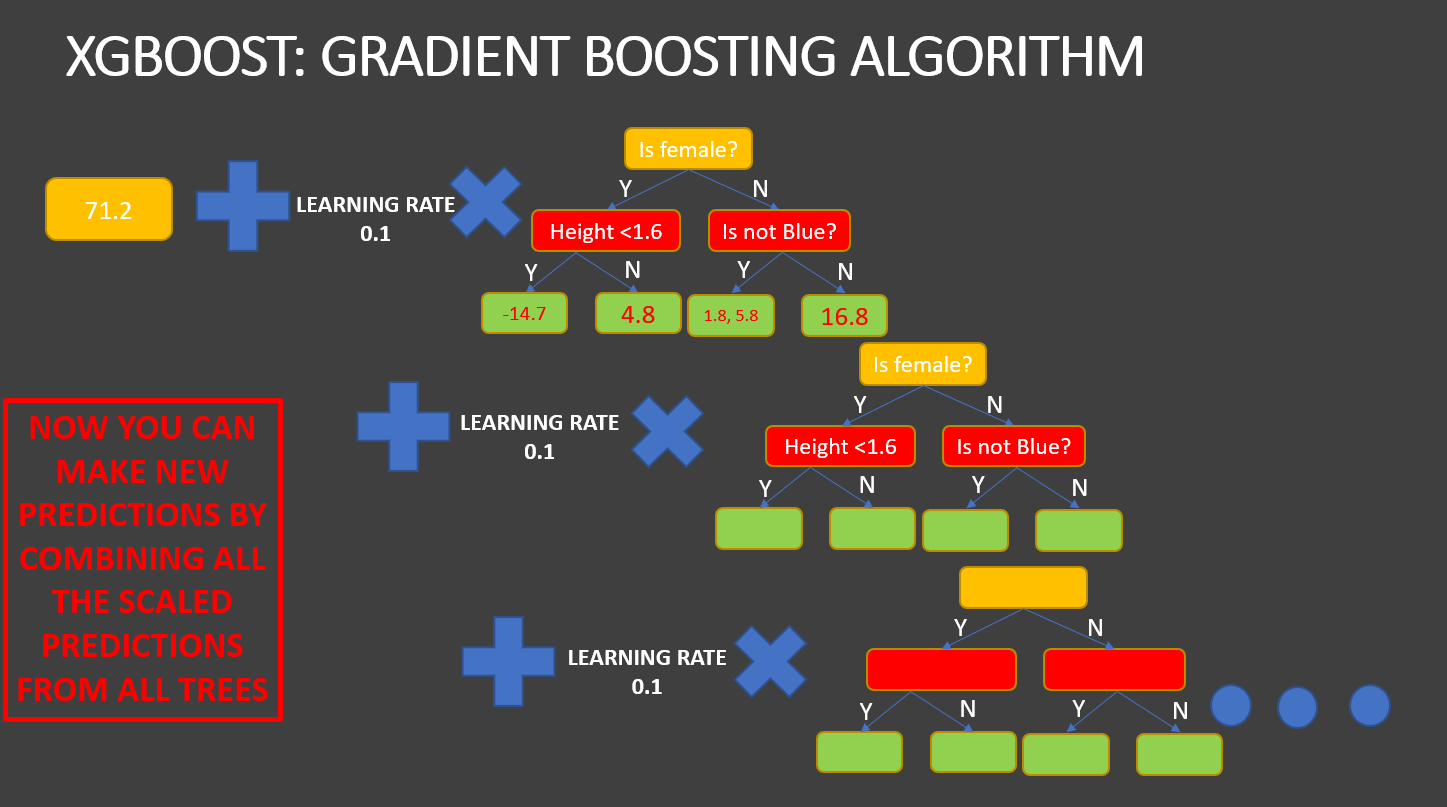

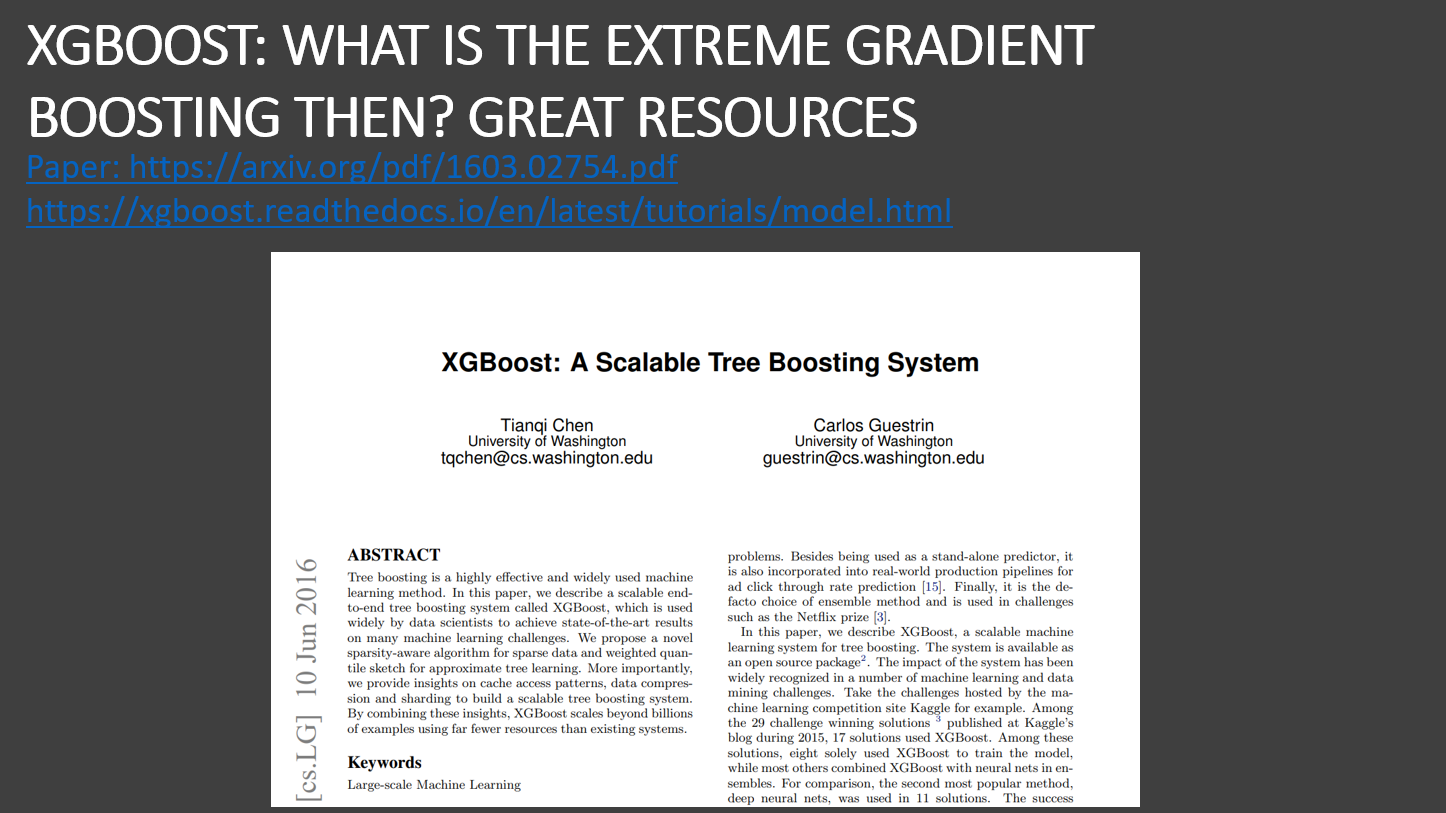

## Train XGB Model

In [37]:
import xgboost as xgb

model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 2, n_estimators = 2)

In [38]:
model.fit(X_train, y_train)

[18:03:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
result_train = model.score(X_train, y_train)
print("Accuracy : {}".format(result_train))

Accuracy : 0.9723032069970845


In [40]:
# predict the score of the trained model using the testing dataset

result_test = model.score(X_test, y_test)
print("Accuracy : {}".format(result_test))

Accuracy : 0.9418604651162791


## Evaluate Model

In [42]:
# make predictions on the test data

y_predict = model.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97        80
         1.0       0.57      0.67      0.62         6

    accuracy                           0.94        86
   macro avg       0.77      0.81      0.79        86
weighted avg       0.95      0.94      0.94        86



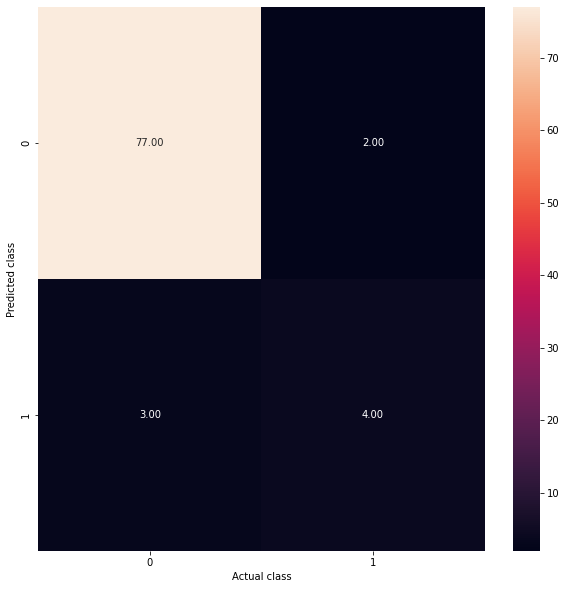

In [44]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_predict, y_test) 
sns.heatmap(cm, annot = True,fmt = '.2f')
plt.ylabel('Predicted class')
plt.xlabel('Actual class');